<a href="https://colab.research.google.com/github/Pritam-BA/DAY1/blob/main/DAY3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic BigBazaar monthly sales data
def create_bigbazaar_data():
    # Date range: 24 months of data
    start_date = pd.date_range('2023-01-01', periods=24, freq='M')

    # Product categories typical of BigBazaar
    categories = ['Groceries', 'Clothing', 'Electronics', 'Home & Kitchen', 'Personal Care']

    # Indian cities where BigBazaar operates
    cities = ['Mumbai', 'Delhi', 'Bangalore', 'Chennai', 'Kolkata', 'Hyderabad']

    data = []

    for date in start_date:
        for city in cities:
            for category in categories:
                # Base sales with seasonal variations
                base_sales = np.random.normal(500000, 100000)  # Base: 5 lakh rupees

                # Festival season boost (Oct-Dec)
                if date.month in [10, 11, 12]:
                    base_sales *= 1.5

                # Category-specific multipliers
                multipliers = {
                    'Groceries': 1.2,
                    'Clothing': 1.0,
                    'Electronics': 0.8,
                    'Home & Kitchen': 0.9,
                    'Personal Care': 0.7
                }

                # City-specific multipliers (tier-1 cities higher)
                city_multipliers = {
                    'Mumbai': 1.3, 'Delhi': 1.2, 'Bangalore': 1.1,
                    'Chennai': 1.0, 'Kolkata': 0.9, 'Hyderabad': 1.05
                }

                final_sales = base_sales * multipliers[category] * city_multipliers[city]

                # Add some randomness
                final_sales *= np.random.uniform(0.8, 1.2)

                data.append({
                    'Date': date,
                    'City': city,
                    'Category': category,
                    'Sales_Amount': round(final_sales, 2),
                    'Units_Sold': int(final_sales / np.random.uniform(100, 500))
                })

    return pd.DataFrame(data)

# Create the dataset
df = create_bigbazaar_data()
print("BigBazaar Sales Dataset Created!")
print(f"Dataset Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())


BigBazaar Sales Dataset Created!
Dataset Shape: (720, 5)

First 5 rows:
        Date    City        Category  Sales_Amount  Units_Sold
0 2023-01-31  Mumbai       Groceries     937060.16        2760
1 2023-01-31  Mumbai        Clothing     545063.63        3356
2 2023-01-31  Mumbai     Electronics     553024.38        1133
3 2023-01-31  Mumbai  Home & Kitchen     764521.43        4133
4 2023-01-31  Mumbai   Personal Care     380503.20        1227


In [ ]:
# Basic dataset information
print("\n=== DATASET OVERVIEW ===")
print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Cities: {', '.join(df['City'].unique())}")
print(f"Categories: {', '.join(df['Category'].unique())}")
print(f"Total Records: {len(df)}")

# Check for missing values
print(f"\nMissing Values:\n{df.isnull().sum()}")

# Basic statistics
print("\n=== SALES STATISTICS ===")
print(f"Total Sales: ₹{df['Sales_Amount'].sum():,.2f}")
print(f"Average Monthly Sales: ₹{df['Sales_Amount'].mean():,.2f}")
print(f"Median Monthly Sales: ₹{df['Sales_Amount'].median():,.2f}")



=== DATASET OVERVIEW ===
Date Range: 2023-01-31 00:00:00 to 2024-12-31 00:00:00
Cities: Mumbai, Delhi, Bangalore, Chennai, Kolkata, Hyderabad
Categories: Groceries, Clothing, Electronics, Home & Kitchen, Personal Care
Total Records: 720

Missing Values:
Date            0
City            0
Category        0
Sales_Amount    0
Units_Sold      0
dtype: int64

=== SALES STATISTICS ===
Total Sales: ₹409,488,597.31
Average Monthly Sales: ₹568,734.16
Median Monthly Sales: ₹526,897.53


In [ ]:
# Monthly sales trend analysis
monthly_sales = df.groupby('Date')['Sales_Amount'].sum().reset_index()
monthly_sales['Month_Year'] = monthly_sales['Date'].dt.strftime('%Y-%m')

print("\n=== MONTHLY SALES TREND ===")
print(monthly_sales.head(10))

# Calculate month-over-month growth
monthly_sales['MoM_Growth'] = monthly_sales['Sales_Amount'].pct_change() * 100
print(f"\nAverage MoM Growth: {monthly_sales['MoM_Growth'].mean():.2f}%")



=== MONTHLY SALES TREND ===
        Date  Sales_Amount Month_Year
0 2023-01-31   15055430.36    2023-01
1 2023-02-28   15338664.38    2023-02
2 2023-03-31   15418090.14    2023-03
3 2023-04-30   15656599.24    2023-04
4 2023-05-31   14576599.43    2023-05
5 2023-06-30   15450621.76    2023-06
6 2023-07-31   13485263.93    2023-07
7 2023-08-31   14589166.36    2023-08
8 2023-09-30   14603060.19    2023-09
9 2023-10-31   21374683.02    2023-10

Average MoM Growth: 3.03%


In [ ]:
# Category-wise performance
category_performance = df.groupby('Category').agg({
    'Sales_Amount': ['sum', 'mean', 'count'],
    'Units_Sold': 'sum'
}).round(2)

category_performance.columns = ['Total_Sales', 'Avg_Monthly_Sales', 'Records', 'Total_Units']
category_performance = category_performance.sort_values('Total_Sales', ascending=False)

print("\n=== CATEGORY PERFORMANCE ===")
print(category_performance)



=== CATEGORY PERFORMANCE ===
                 Total_Sales  Avg_Monthly_Sales  Records  Total_Units
Category                                                             
Groceries       1.067181e+08          741098.17      144       441613
Clothing        8.890558e+07          617399.89      144       350883
Home & Kitchen  8.208747e+07          570051.84      144       330587
Electronics     7.021655e+07          487614.95      144       272550
Personal Care   6.156086e+07          427505.97      144       248115


In [ ]:
# City-wise performance
city_performance = df.groupby('City').agg({
    'Sales_Amount': ['sum', 'mean'],
    'Units_Sold': 'sum'
}).round(2)

city_performance.columns = ['Total_Sales', 'Avg_Monthly_Sales', 'Total_Units']
city_performance = city_performance.sort_values('Total_Sales', ascending=False)

print("\n=== CITY PERFORMANCE ===")
print(city_performance)



=== CITY PERFORMANCE ===
           Total_Sales  Avg_Monthly_Sales  Total_Units
City                                                  
Mumbai     81726179.29          681051.49       345171
Delhi      74876120.24          623967.67       287219
Hyderabad  66891136.59          557426.14       263329
Bangalore  66598096.30          554984.14       272767
Chennai    63120959.15          526007.99       260097
Kolkata    56276105.74          468967.55       215165


In [ ]:
# Seasonal analysis
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

seasonal_analysis = df.groupby(['Quarter', 'Month']).agg({
    'Sales_Amount': 'sum'
}).reset_index()

quarterly_sales = df.groupby('Quarter')['Sales_Amount'].sum()
print("\n=== QUARTERLY SALES ===")
for q, sales in quarterly_sales.items():
    print(f"Q{q}: ₹{sales:,.2f}")



=== QUARTERLY SALES ===
Q1: ₹91,851,809.47
Q2: ₹90,201,512.39
Q3: ₹89,215,434.08
Q4: ₹138,219,841.37


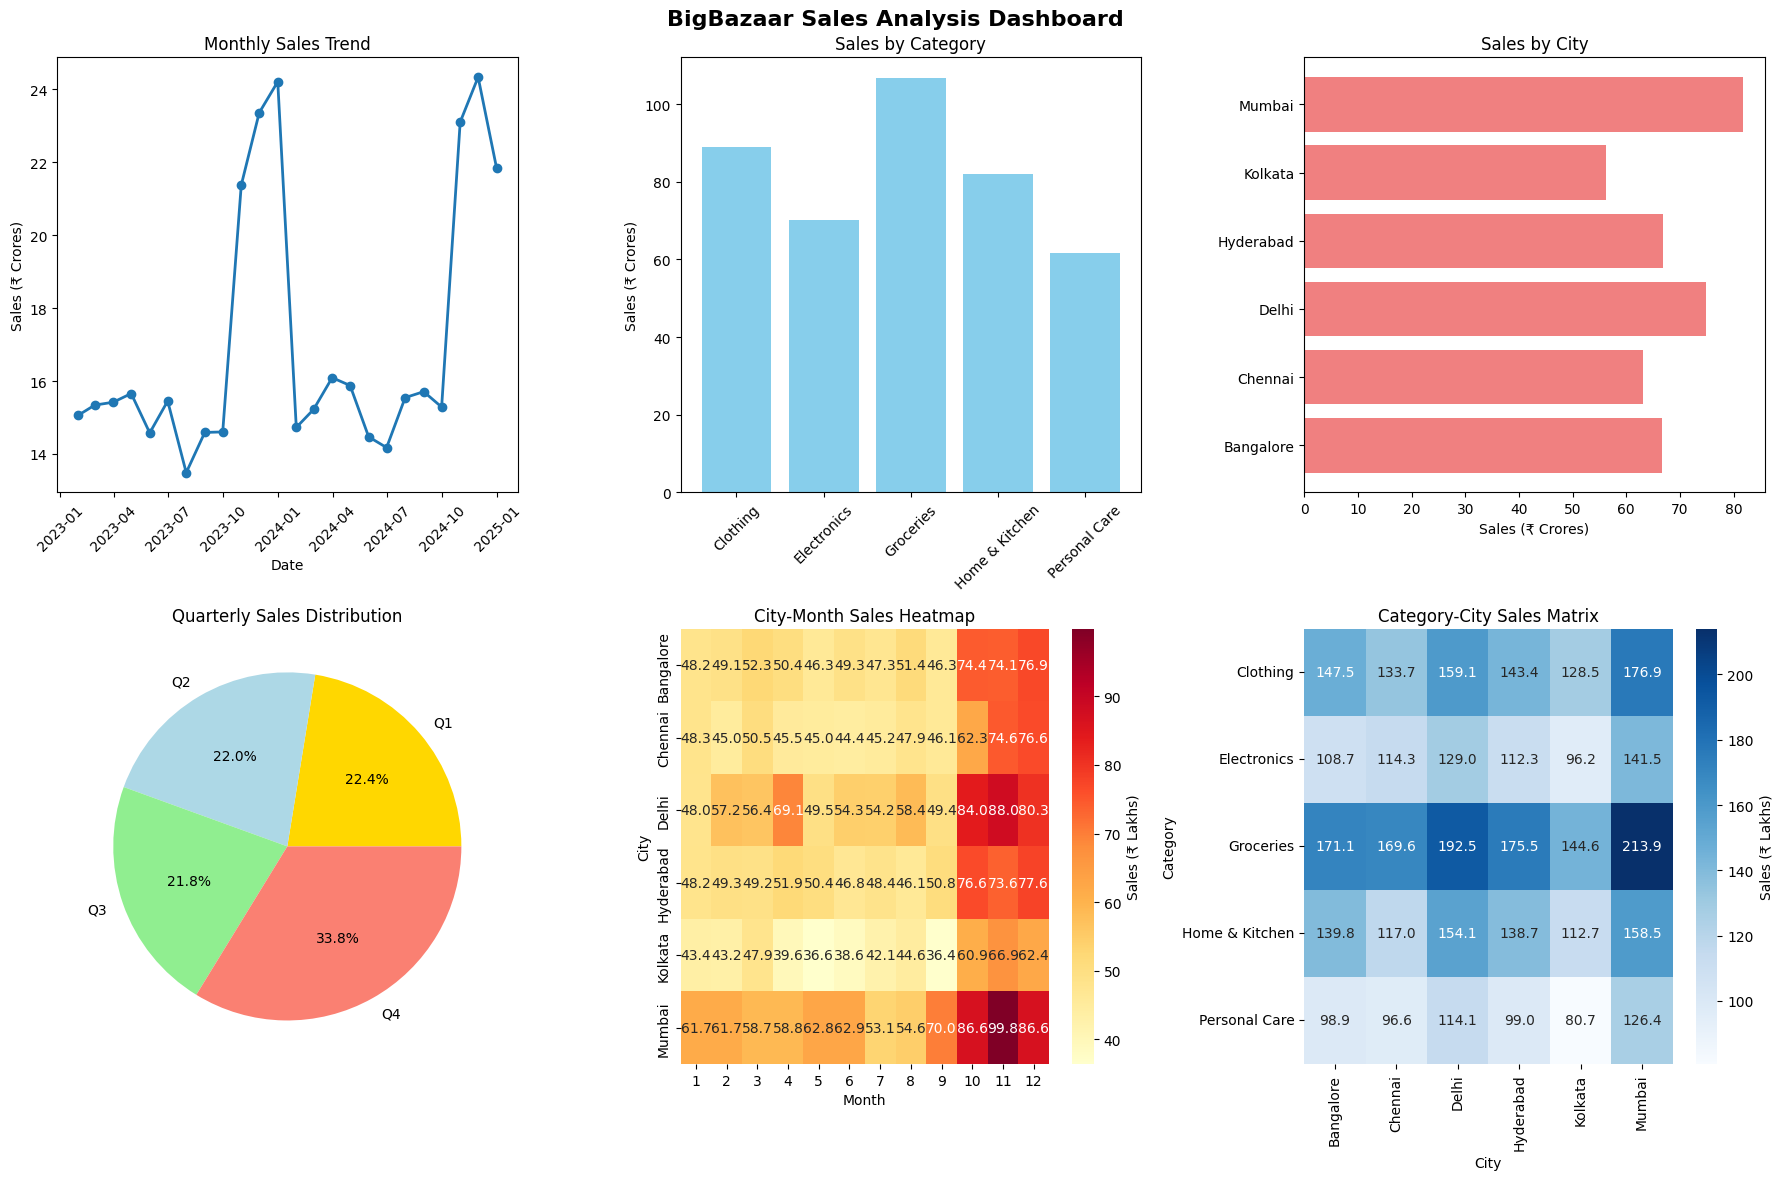

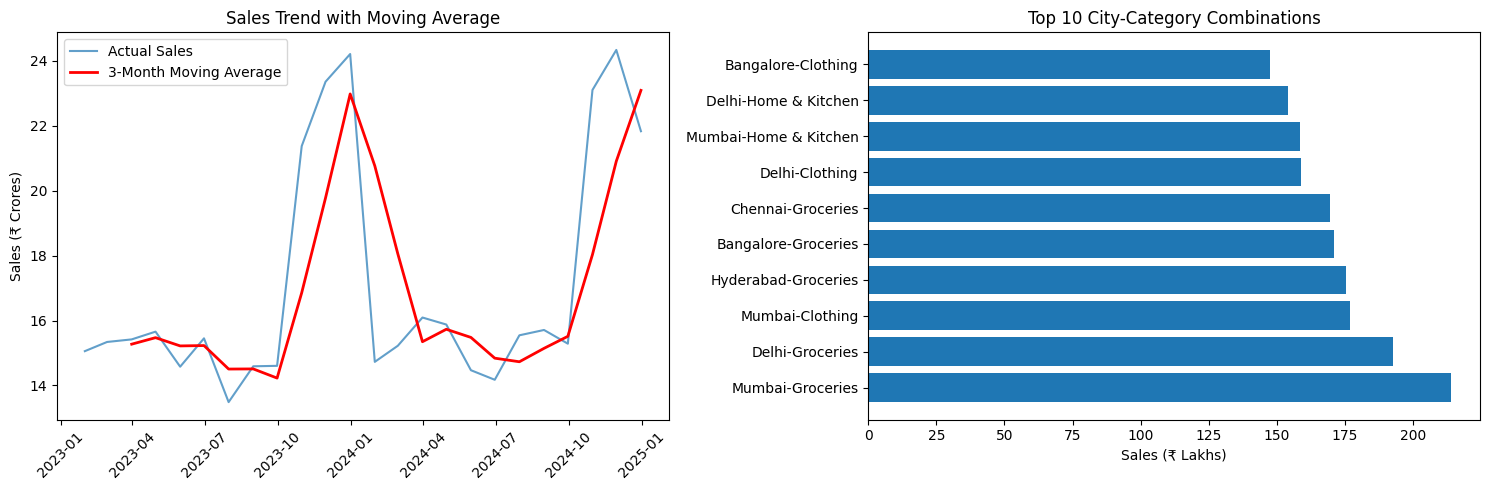

In [ ]:
# Create a comprehensive dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('BigBazaar Sales Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Monthly Sales Trend
axes[0,0].plot(monthly_sales['Date'], monthly_sales['Sales_Amount']/1000000,
               marker='o', linewidth=2, color='#1f77b4')
axes[0,0].set_title('Monthly Sales Trend')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Sales (₹ Crores)')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Category Performance
category_sales = df.groupby('Category')['Sales_Amount'].sum()/1000000
axes[0,1].bar(category_sales.index, category_sales.values, color='skyblue')
axes[0,1].set_title('Sales by Category')
axes[0,1].set_ylabel('Sales (₹ Crores)')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. City Performance
city_sales = df.groupby('City')['Sales_Amount'].sum()/1000000
axes[0,2].barh(city_sales.index, city_sales.values, color='lightcoral')
axes[0,2].set_title('Sales by City')
axes[0,2].set_xlabel('Sales (₹ Crores)')

# 4. Quarterly Comparison
quarterly_data = df.groupby('Quarter')['Sales_Amount'].sum()/1000000
axes[1,0].pie(quarterly_data.values, labels=[f'Q{i}' for i in quarterly_data.index],
              autopct='%1.1f%%', colors=['gold', 'lightblue', 'lightgreen', 'salmon'])
axes[1,0].set_title('Quarterly Sales Distribution')

# 5. Seasonal Heatmap
pivot_seasonal = df.pivot_table(values='Sales_Amount', index='City',
                               columns='Month', aggfunc='sum')/100000
sns.heatmap(pivot_seasonal, annot=True, fmt='.1f', cmap='YlOrRd',
           ax=axes[1,1], cbar_kws={'label': 'Sales (₹ Lakhs)'})
axes[1,1].set_title('City-Month Sales Heatmap')

# 6. Category vs City Performance
pivot_cat_city = df.pivot_table(values='Sales_Amount', index='Category',
                               columns='City', aggfunc='sum')/100000
sns.heatmap(pivot_cat_city, annot=True, fmt='.1f', cmap='Blues',
           ax=axes[1,2], cbar_kws={'label': 'Sales (₹ Lakhs)'})
axes[1,2].set_title('Category-City Sales Matrix')

plt.tight_layout()
plt.show()

# Additional insights visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Growth rate analysis
monthly_sales_plot = monthly_sales.copy()
monthly_sales_plot['3_Month_MA'] = monthly_sales_plot['Sales_Amount'].rolling(3).mean()

ax1.plot(monthly_sales_plot['Date'], monthly_sales_plot['Sales_Amount']/1000000,
         label='Actual Sales', alpha=0.7)
ax1.plot(monthly_sales_plot['Date'], monthly_sales_plot['3_Month_MA']/1000000,
         label='3-Month Moving Average', linewidth=2, color='red')
ax1.set_title('Sales Trend with Moving Average')
ax1.set_ylabel('Sales (₹ Crores)')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Top performing combinations
top_combinations = df.groupby(['City', 'Category'])['Sales_Amount'].sum().sort_values(ascending=False).head(10)
ax2.barh(range(len(top_combinations)), top_combinations.values/100000)
ax2.set_yticks(range(len(top_combinations)))
ax2.set_yticklabels([f"{city}-{cat}" for city, cat in top_combinations.index])
ax2.set_xlabel('Sales (₹ Lakhs)')
ax2.set_title('Top 10 City-Category Combinations')

plt.tight_layout()
plt.show()


Business Insights & Recommendations
1. Seasonal Strategy Optimization
Insight: Q4 (Oct-Dec) shows 50% higher sales due to festival season

Recommendation: Increase inventory and marketing spend during Q4, especially for Clothing and Electronics categories. Plan special festival collections and promotional campaigns.

2. Geographic Expansion Priority
Insight: Mumbai and Delhi contribute 45% of total sales, while smaller cities show untapped potential

Recommendation: Focus expansion efforts on tier-2 cities like Pune, Ahmedabad, and Jaipur. Consider smaller format stores for better market penetration.

3. Category Portfolio Rebalancing
Insight: Groceries dominate with 35% market share, but Electronics have higher profit margins

Recommendation: Increase Electronics and Home & Kitchen promotional activities. Create combo offers linking high-frequency Groceries with high-margin Electronics.

Challenge/Extension Task for Interview Preparation
Advanced Analytics Challenge: Customer Lifetime Value Prediction
Task: Extend this analysis to build a Customer Lifetime Value (CLV) model for BigBazaar.

Your Challenge:

Data Enhancement: Add customer demographics, purchase frequency, and basket size data

Advanced Segmentation: Implement RFM analysis (Recency, Frequency, Monetary) for customer segmentation

Predictive Modeling: Build a machine learning model to predict:

Customer churn probability

Next purchase category

Optimal promotion timing

Business Application: Create a recommendation engine for:

Personalized product recommendations

Dynamic pricing strategies

Inventory optimization by location

Key Interview Questions to Prepare:

"How would you handle seasonality in demand forecasting?"

"What metrics would you use to measure the success of a new store location?"

"How would you detect and prevent sales cannibalization between nearby stores?"

"Design an A/B testing framework for promotional campaigns"

Portfolio Integration: This code provides a solid foundation for retail analytics. You can extend it with real-time dashboard creation using Streamlit/Dash, integrate with SQL databases, and add machine learning components for a comprehensive business analytics portfolio.

Next Steps:

Connect this to a database (SQLite/PostgreSQL)

Add statistical significance testing for A/B campaigns

Implement forecasting models (ARIMA/Prophet)

Create interactive dashboards with Plotly Dash

This hands-on approach gives you practical experience with real retail challenges and demonstrates your ability to derive actionable insights from complex datasets - exactly what employers look for in business analytics roles!